# Performing advance dimentionality reduction in image dataset

## Step1: Import necessary libraries and load datasets

In [1]:
# Install and import required libraries
!pip install kaggle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the CIFAR-10 zip file in your Google Drive
zip_path = '/content/drive/My Drive/cifar-10.zip'

# Extract the zip file
extract_path = '/content/cifar10'
os.makedirs(extract_path, exist_ok=True)

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"CIFAR-10 dataset extracted to {extract_path}")

CIFAR-10 dataset extracted to /content/cifar10


## Step2: Preprocess and prepare the data

In [ ]:
import numpy as np
import tensorflow as tf

# Load CIFAR-10 using TensorFlow's dataset utilities
from tensorflow.keras.datasets import cifar10

# Split into train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print shapes
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [ ]:
# Flatten image data (32x32x3 -> 3072)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"Flattened test data shape: {x_test_flat.shape}")


Flattened training data shape: (50000, 3072)
Flattened test data shape: (10000, 3072)


This block visualizes a few sample images from the CIFAR-10 dataset, displaying their corresponding labels. It helps in understanding what the data looks like before applying dimensionality reduction.




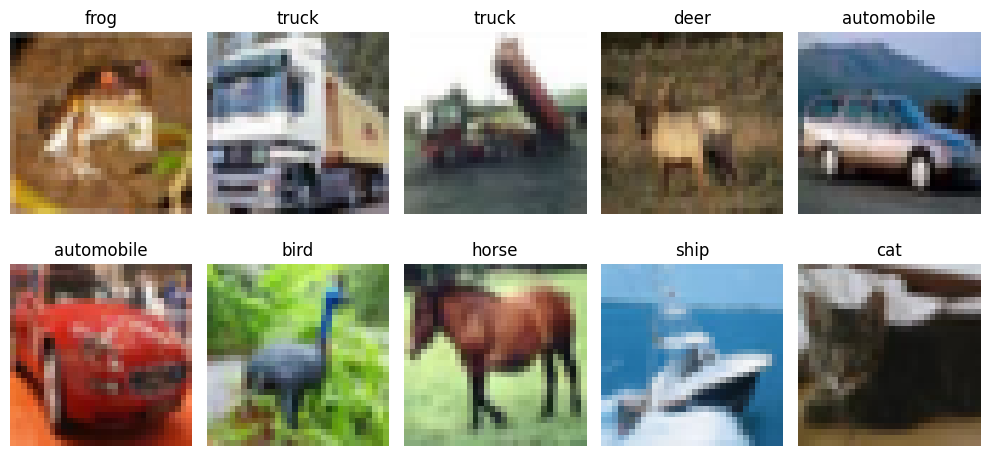

In [ ]:
# Visualize some sample images with their labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Plot sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Step3: Apply dimensionality reduction techniques

- Linear Local Embedding (LLE)
- t-SNE with interactive visualization
- ISOMAP
- UMAP with interactive visualization
- Multidimensional Scaling (MDS)
- Randomized PCA
- Kernel PCA
- Incremental PCA
- Factor Analysis
- Autoencoders

Linear Local Embedding (LLE)

LLE is a non-linear dimensionality reduction technique. We'll reduce the data to 2D for visualization.

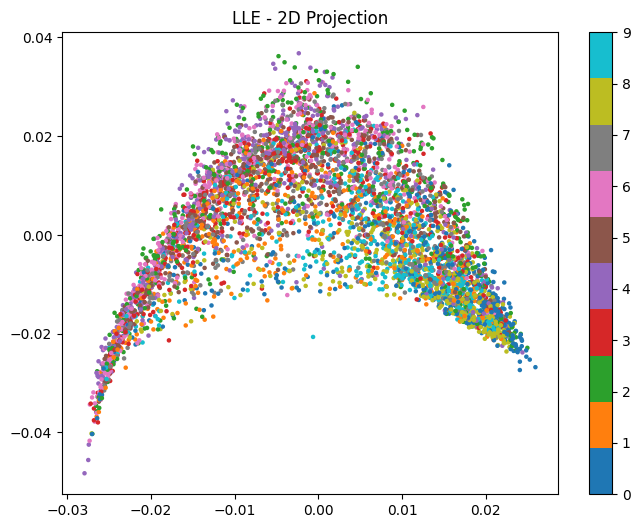

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply LLE to reduce to 2 dimensions
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
x_train_lle = lle.fit_transform(x_train_flat[:5000])  # Use a subset for faster computation

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_lle[:, 0], x_train_lle[:, 1], c=y_train[:5000].flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title('LLE - 2D Projection')
plt.show()


t-SNE with Interactive Visualization

t-SNE is excellent for visualizing high-dimensional data. To create an interactive plot, we'll use plotly

This block applies t-SNE, a non-linear dimensionality reduction technique, and uses plotly to create an interactive 2D scatter plot. It is particularly good at clustering similar data points.

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_flat[:1000])  # Use a smaller subset due to computation time

# Interactive scatter plot
fig = px.scatter(x_train_tsne, x=x_train_tsne[:, 0], y=x_train_tsne[:, 1],
                 color=y_train[:1000].flatten().astype(str),
                 labels={'color': 'Label'},
                 title='t-SNE - Interactive Visualization')
fig.show()


ISOMAP

ISOMAP is another manifold learning method that reduces dimensions while preserving geodesic distances.

This block applies ISOMAP, another manifold learning technique, to reduce the data to 2D while preserving the geodesic distances between data points. The result is visualized in a 2D scatter plot.

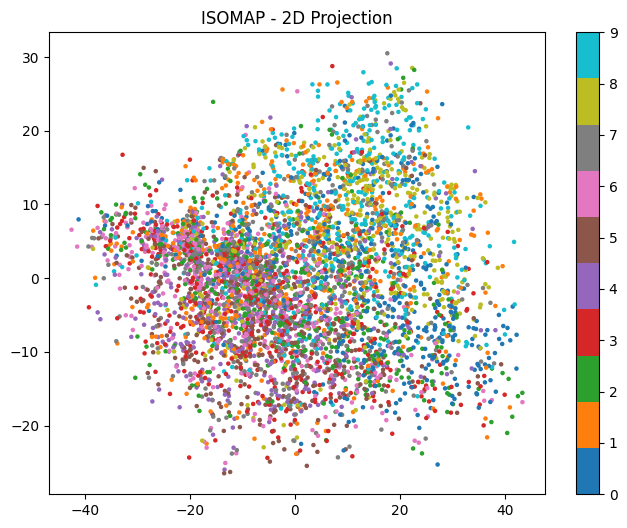

In [ ]:
from sklearn.manifold import Isomap

# Apply ISOMAP
isomap = Isomap(n_components=2, n_neighbors=10)
x_train_isomap = isomap.fit_transform(x_train_flat[:5000])

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_isomap[:, 0], x_train_isomap[:, 1], c=y_train[:5000].flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title('ISOMAP - 2D Projection')
plt.show()


UMAP (Uniform Manifold Approximation and Projection)

UMAP is a powerful technique for dimensionality reduction and is particularly effective for high-dimensional data. We will also use plotly for an interactive 2D visualization.

In [ ]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


This block uses UMAP for dimensionality reduction, which is effective for capturing both global and local data structures. The result is visualized using an interactive plot.

In [ ]:
import umap
import plotly.express as px

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
x_train_umap = umap_reducer.fit_transform(x_train_flat[:5000])  # Use a subset

# Interactive scatter plot
fig = px.scatter(x=x_train_umap[:, 0], y=x_train_umap[:, 1],
                 color=y_train[:5000].flatten().astype(str),
                 labels={'color': 'Label'},
                 title='UMAP - Interactive Visualization')
fig.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



MDS (Multi-Dimensional Scaling)

MDS reduces dimensionality by preserving the pairwise distances between points in the high-dimensional space.

This block uses MDS to reduce the data to 2D by preserving pairwise distances between points in high-dimensional space. The reduced data is visualized in a scatter plot.




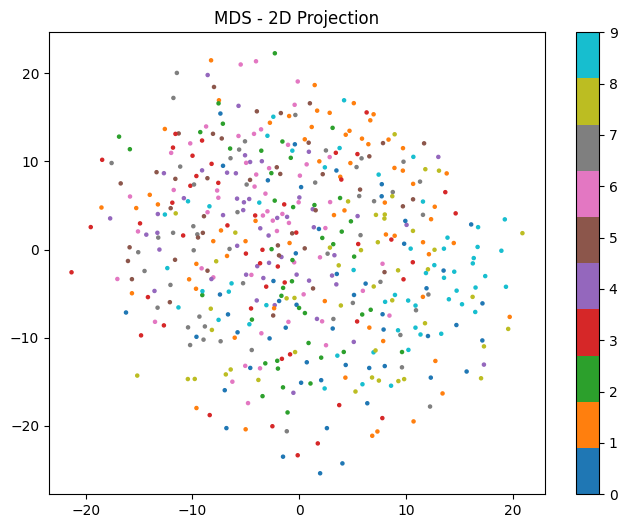

In [ ]:
from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=2, random_state=42)
x_train_mds = mds.fit_transform(x_train_flat[:500])  # Use a subset

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_mds[:, 0], x_train_mds[:, 1], c=y_train[:500].flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title('MDS - 2D Projection')
plt.show()


PCA Variants

a) Randomized PCA
A faster approximation of PCA, useful for large datasets.

This block uses Randomized PCA for dimensionality reduction, which is a faster approximation of standard PCA.

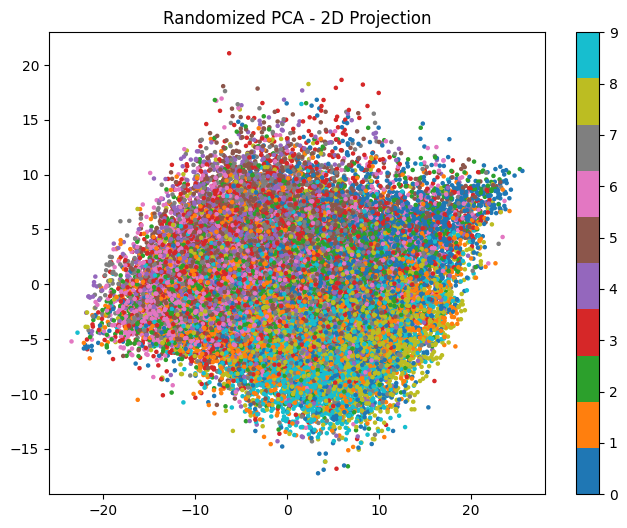

In [ ]:
from sklearn.decomposition import PCA

# Apply Randomized PCA
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
x_train_random_pca = randomized_pca.fit_transform(x_train_flat)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_random_pca[:, 0], x_train_random_pca[:, 1], c=y_train.flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title('Randomized PCA - 2D Projection')
plt.show()


b) Kernel PCA

Kernel PCA applies a non-linear kernel to capture more complex structures in the data.

This block uses Kernel PCA with an RBF kernel to capture non-linear relationships in the data.

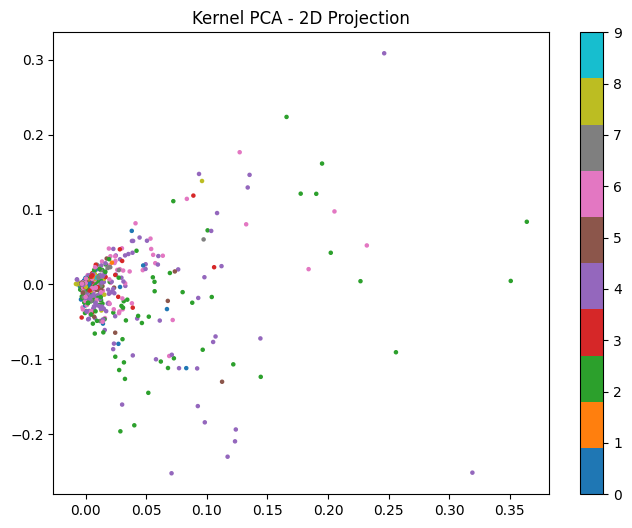

In [ ]:
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA with RBF kernel
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
x_train_kernel_pca = kernel_pca.fit_transform(x_train_flat[:5000])  # Use a subset

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_kernel_pca[:, 0], x_train_kernel_pca[:, 1], c=y_train[:5000].flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title('Kernel PCA - 2D Projection')
plt.show()


c) Incremental PCA

This is useful for datasets that are too large to fit in memory.

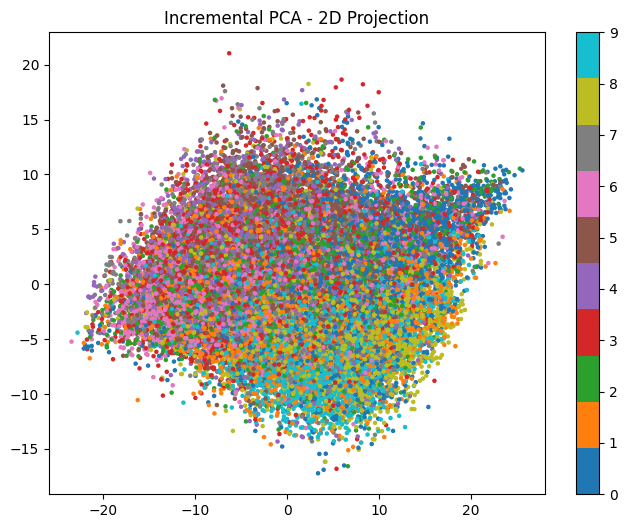

In [ ]:
from sklearn.decomposition import IncrementalPCA

# Apply Incremental PCA
incremental_pca = IncrementalPCA(n_components=2)
x_train_incr_pca = incremental_pca.fit_transform(x_train_flat)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_incr_pca[:, 0], x_train_incr_pca[:, 1], c=y_train.flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title('Incremental PCA - 2D Projection')
plt.show()


Factor Analysis

Factor Analysis models the data as a combination of hidden factors.

This block uses Factor Analysis, which models the data as a combination of hidden factors, for dimensionality reduction.

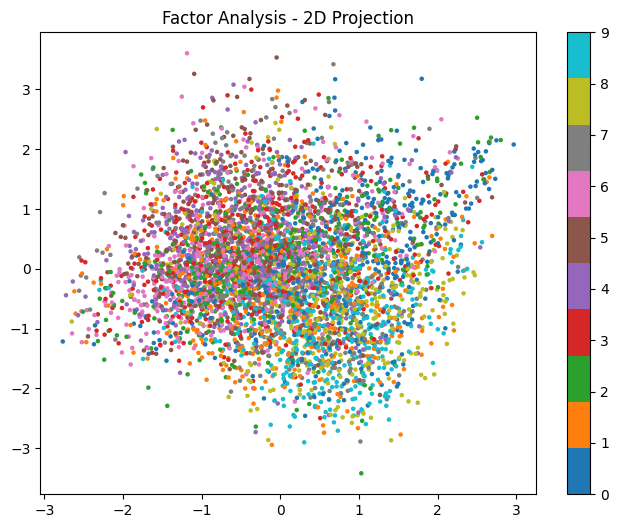

In [ ]:
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
x_train_factor_analysis = factor_analysis.fit_transform(x_train_flat[:500])  # Use a subset

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_factor_analysis[:, 0], x_train_factor_analysis[:, 1], c=y_train[:500].flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title('Factor Analysis - 2D Projection')
plt.show()


Autoencoders

Autoencoders are neural networks designed to compress and reconstruct data. Here’s how you can apply one:

This block trains an autoencoder neural network to learn a compressed representation of the data. The encoder’s output is visualized as the reduced 2D data.

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - loss: 1.0694 - val_loss: 0.8541
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.8482 - val_loss: 0.8366
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.8424 - val_loss: 0.8340
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.8460 - val_loss: 0.8339
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.8391 - val_loss: 0.8325
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.8397 - val_loss: 0.8380
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.8434 - val_loss: 0.8325
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.8396 - val_loss: 0.8350
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.8399 - val_loss: 0.8327
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.8432 - val_loss: 0.8345
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.8439 - val_loss: 0.8368
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━

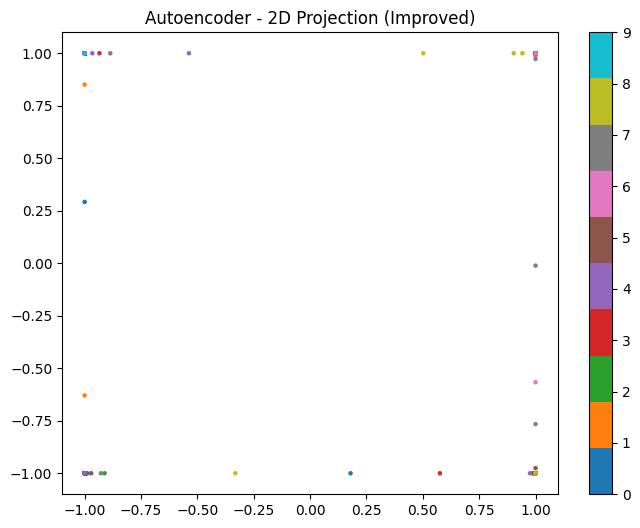

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Normalize the input data
scaler = StandardScaler()
x_train_flat_scaled = scaler.fit_transform(x_train_flat)

# Define the Autoencoder architecture
input_dim = x_train_flat_scaled.shape[1]
encoding_dim = 2  # Dimensionality reduction to 2D

# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dropout(0.2)(encoded)  # Add dropout for regularization
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='tanh')(encoded)  # Use tanh for wider range

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Define the Autoencoder and Encoder models
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# Compile the Autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the Autoencoder
history = autoencoder.fit(x_train_flat_scaled, x_train_flat_scaled,
                          epochs=50,  # Increase the number of epochs
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

# Apply the encoder to reduce dimensionality
x_train_autoenc = encoder.predict(x_train_flat_scaled[:5000])  # Use a subset

# Visualize the encoded 2D data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_autoenc[:, 0], x_train_autoenc[:, 1],
            c=y_train[:5000].flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title('Autoencoder - 2D Projection (Improved)')
plt.show()
